# Code to retreive Short Register of Norwegian Stocks and Graph result

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib notebook


In [2]:
df = pd.read_json("https://ssr.finanstilsynet.no/api/Issuers?extension=json")

df.head()

,ISIN,LastChange,Name,NumPositions,Positions,ShortPercent,ShortedSum
0,BMG067231032,2018-05-28T00:00:00,Avance Gas Holding,131,[{'Id': 'a81f301b-7a5c-46c8-a12b-a2387fd822e3'...,6.4800,4192124
1,NO0010199151,2018-05-28T00:00:00,Petroleum Geo-Services,539,[{'Id': 'dd8b0a59-dbea-4a11-8c39-3fe02713ee9b'...,9.6670,32853304
2,NO0010633951,2018-05-25T00:00:00,B2Holding,1,[{'Id': '51276849-8e03-447f-b208-f85acd430323'...,0.5644,2294573
3,NO0010808892,2018-05-25T00:00:00,Crayon Group Holding,5,[{'Id': 'a7f161c1-c772-419f-8513-0cfeef77640c'...,0.0000,0
4,BMG3682E1921,2018-05-25T00:00:00,Frontline,82,[{'Id': '5490a657-7ef5-4f5c-a77c-caf9a14b2681'...,4.5100,7679586


Crayon Group Holding
Two Sigma Investments, LP                         0.00
Renaissance Technologies LLC                      0.00
Two Sigma Advisers, LP                            0.00
Connor, Clark & Lunn Investment Management Ltd    1.30
WorldQuant LLC                                    0.00
Marshall Wace LLP                                 1.19
OXFORD ASSET MANAGEMENT LLP                       0.80
QVT Financial LP                                  1.22
Total                                             4.51
Name: 2018-05-25 00:00:00, dtype: float64


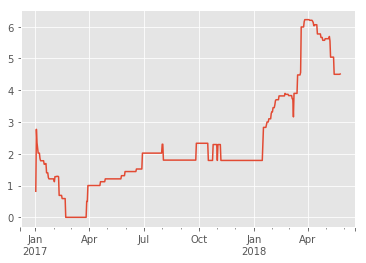

In [3]:
df_test = pd.DataFrame(df['Positions'][4])
print(df['Name'][3])
idxs = pd.date_range(df_test['ShortingDate'].min(), df_test['ShortingDate'].max())
df_values = pd.DataFrame(index=idxs)
for idx in reversed(df_test.index):
    #print(idx, df_test.loc[idx, 'PositionHolder'], df_test.loc[idx, 'ShortPercent'])
    if df_test.loc[idx, 'PositionHolder'] not in df_values.columns:
        df_values[df_test.loc[idx, 'PositionHolder']] = np.nan
        
    #df_values[df_test.loc[idx, 'PositionHolder']]
    if df_test.loc[idx, 'Status'] == 2:
        df_values.loc[df_test.loc[idx, 'ShortingDate'], df_test.loc[idx, 'PositionHolder']] = df_test.loc[idx, 'ShortPercent']
    
#df_values['Total'] = df_values.sum(axis=1)
#df_values
df_fixed = df_values
one_day = timedelta(days=1)
for coloumn in df_fixed.columns:
    for idx, value in df_fixed[coloumn].iteritems():
        #print(idx)
        #print(df_fixed[coloumn].loc[idx])
        if pd.isnull(df_fixed[coloumn].loc[idx]) and idx != df_fixed.index.values[0]:
            #print(df_fixed[coloumn].loc[idx])
            df_fixed[coloumn].loc[idx] = df_fixed[coloumn].loc[idx-one_day]
            

df_fixed['Total'] = df_values.sum(axis=1)
print(df_fixed.iloc[-1,:])
#print(df_fixed.tail())


data = df_fixed['Total']



data.plot()


    

